In [135]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.interpolate import InterpolatedUnivariateSpline

In [136]:
a =np.loadtxt("j.txt",unpack=True)
Masa = a[1,:]*(1e-3)
M= Masa[399]                             ## Masa sobre la superficie
Radio = a[2,:]*(1e-7)
R= Radio[399]                            ## Radio sobre la superficie
Densidad = a[4,:]*(1e3)
G = 6.67e-11                                   ## Constante de Cavendish
n = 1000                   ## Numero de puntos
dr = (Radio[399]-Radio[0])/(n-1)   ## dr
r = np.arange(Radio[0],R + dr/2,dr)
D_i = InterpolatedUnivariateSpline(Radio,Densidad)(r)      ## Funcion Interpolada creando una rejilla igual/ espaciada

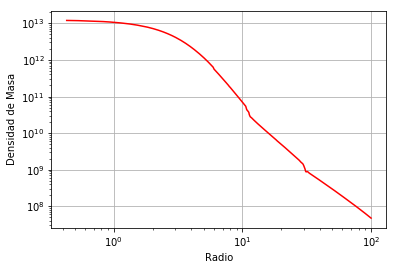

In [137]:
plt.grid()                     ## Grafico r vs rho

plt.xlabel('Radio')
plt.ylabel('Densidad de Masa')
plt.loglog(r,D_i,'r')

In [138]:
def e(x,y):                       ## Primer Metodo   x = R_s  and   y = M_s

    # Set up variables             
    z = np.zeros(n)               ## Derivada del potencial
    f = np.zeros(n)               ## Potencial
    f_s = - (G*y)/x
     
    # Set up central values (initial values)
    
    z[0] = 0.0
    f[0] = 0.0
    
    for i in range(1,n):
        
        f[i] = f[i-1] + z[i-1]*dr
        z[i] = z[i-1] + (4.0*pi*G*D_i[i] - 2*z[i-1]/r[i])*dr
    
    f_c = f_s - f[n-1]             ## Se halla la diferencia para poder hallar + C
    f = f + f_c                    ## Aca se corrige
    return(z,f,f[0],f[n-1]) 

In [139]:
def mm(z,y):                       ## Segundo Metodo       x = R_s  and   y = M_s
    
       # Set up variables

    x = 1/dr
    j = np.zeros((n,n)) 
    b = np.zeros(n)                           
    f = np.zeros(n)               ## Potencial
    f_s = - (G*y)/z

    for i in range (0,n):

        b[i] = 4*pi*G*D_i[i]

    for k in range(0,n):                      ## Matriz A del sistema
        for l in range (0,n):
            if k == l and k == 0:
               j[k][l] = -(x**2) - (x/r[k])
            elif k == l and  k != 0:
               j[k][l] = -2*(x**2)
            elif k+1 == l:
               j[k][l] = x**2 + (x/r[k]) 
            elif k == l+1:
               j[k][l] = x**2 - (x/r[k])
            else:
               j[k][l] = 0.0
    
    f = np.linalg.solve(j,b)
    
    f_c = f_s - f[n-1]             ## Se halla la diferencia para poder hallar + C
    f = f + f_c                    ## Aca se corrige
    return f

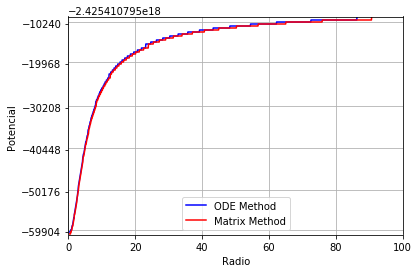

In [140]:
plt.grid()                         ## Grafico el potencial obtenido por ambos metodos

plt.xlabel('Radio')
plt.ylabel('Potencial')
plt.plot(r,e(R,M)[1],'b')
plt.axis([0,R,e(R,M)[2],e(R,M)[3]])
plt.plot(r,mm(R,M),'r')
plt.axis([0,R,mm(R,M)[0],mm(R,M)[n-1]])
plt.legend(('ODE Method', 'Matrix Method'),prop = {'size':10}, loc = 'lower center')